### 简介
对“数据层”处理用的较多的就是各种采样技术，包括过采样、欠采样、混合采样等，采样技术比较方便的一点是它和后面的建模流程相对独立，可以有更多的探索空间，它通常也是数据预处理阶段的一种常用技术，这一节主要借助于imblearn工具对过采样、欠采样、混合采样技术做介绍

In [1]:
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
from imblearn import over_sampling,under_sampling,combine
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=2,
                           n_informative=2,n_redundant=0,
                           n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)
sorted(Counter(y).items())

[(0, 64), (1, 262), (2, 4674)]

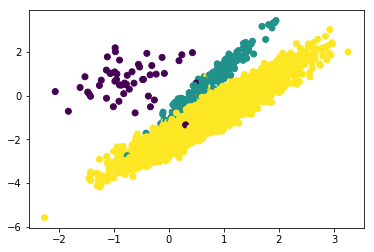

In [3]:
plt.scatter(x=X[:,0],y=X[:,1],c=y)

### 一.过采样
主要包括随机过采样，SMOTE采样这两大类

#### 1.1随机过采样（ROS）
主要思路：随机抽取正样本并进行多次复制

[(0, 4674), (1, 4674), (2, 4674)]

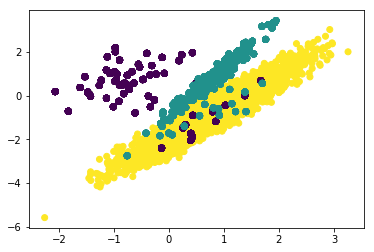

In [4]:
ros = over_sampling.RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
plt.scatter(x=X_resampled[:,0],y=X_resampled[:,1],c=y_resampled)
sorted(Counter(y_resampled).items())

#### 1.2 SMOTE采样
与ROS的简单复制不同，SMOTE会选择正样本附近的`k`个同类样本中的某一个，并在它们连线上的一个随机位置处生成新样本

[(0, 4674), (1, 4674), (2, 4674)]

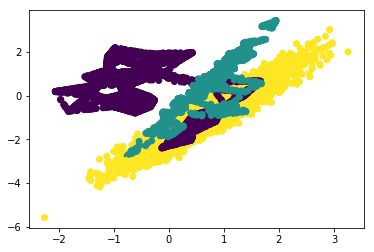

In [5]:
X_resampled, y_resampled = over_sampling.SMOTE().fit_resample(X, y)
plt.scatter(x=X_resampled[:,0],y=X_resampled[:,1],c=y_resampled)
sorted(Counter(y_resampled).items())

#### 1.3 BorderlineSMOTE
BorderlineSMOTE只考虑对边界处的正样本做SMOTE操作，但有两种方式：  
（1）`kind=borderline-1`：对边界正样本附近的**同类**样本做SMOTE(default)  
（2）`kind=borderline-2`：对边界正样本附近的**所有**样本做SMOTE，不过新生成的样本点需要靠近正样本点（在正样本点和连线的中位点之间生成新样本）

[(0, 4674), (1, 4674), (2, 4674)]

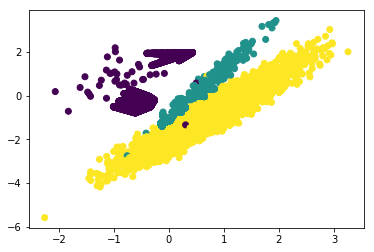

In [6]:
#kind=borderline-1
X_resampled, y_resampled = over_sampling.BorderlineSMOTE().fit_resample(X, y)
plt.scatter(x=X_resampled[:,0],y=X_resampled[:,1],c=y_resampled)
sorted(Counter(y_resampled).items())

[(0, 4674), (1, 4673), (2, 4674)]

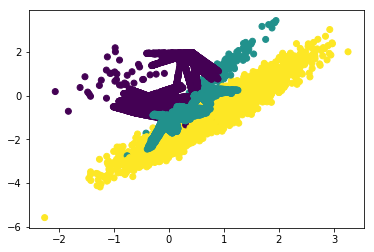

In [7]:
#kind=borderline-2，可以发现新生成的正样本有嵌入负样本的趋势
X_resampled, y_resampled = over_sampling.BorderlineSMOTE(kind='borderline-2').fit_resample(X, y)
plt.scatter(x=X_resampled[:,0],y=X_resampled[:,1],c=y_resampled)
sorted(Counter(y_resampled).items())

#### 1.4 ADASYN
ADASYN的操作其实与BorderlineSMOTE类似，它选择某一正样本进行SMOTE操作的概率为：  

$$
P_i=\frac{N_i^{maj}/K}{Z}
$$  

这里$P_i$表示第$i$个正样本被选的概率，$N_i^{maj}$表示第$i$个正样本最近邻的$K$个样本中**负样本**的数量，$Z$是归一化因子，所以越是边界处的正样本越有可能进行SMOTE操作

[(0, 4673), (1, 4662), (2, 4674)]

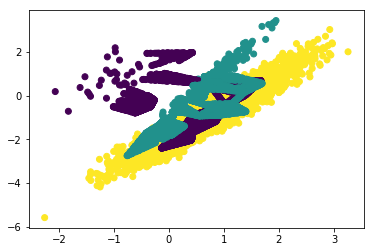

In [8]:
X_resampled, y_resampled = over_sampling.ADASYN().fit_resample(X, y)
plt.scatter(x=X_resampled[:,0],y=X_resampled[:,1],c=y_resampled)
sorted(Counter(y_resampled).items())

#### 1.5 SVMSMOTE
SVMSMOTE的思路其实与BorderlineSMOTE也类似，它首先通过训练SVM找到支撑向量点，然后对这些点进行SMOTE操作；  
特点：可以发现新生成的正样本不太会嵌入到负样本中

[(0, 4674), (1, 4674), (2, 4674)]

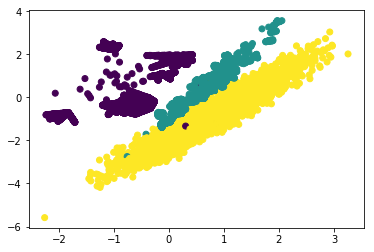

In [9]:
X_resampled, y_resampled = over_sampling.SVMSMOTE().fit_resample(X, y)
plt.scatter(x=X_resampled[:,0],y=X_resampled[:,1],c=y_resampled)
sorted(Counter(y_resampled).items())

#### 1.6 KMeansSMOTE
先对正样本聚类，根据聚类密度对正样本做SMOTE  
https://arxiv.org/pdf/1711.00837.pdf

[(0, 4674), (1, 4674), (2, 4674)]

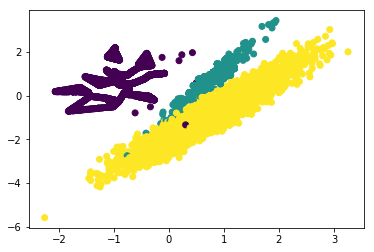

In [10]:
X_resampled, y_resampled = over_sampling.KMeansSMOTE().fit_resample(X, y)
plt.scatter(x=X_resampled[:,0],y=X_resampled[:,1],c=y_resampled)
sorted(Counter(y_resampled).items())

#### 二.欠采样
欠采样的套路相对多一点，主要可分为以下几类：  
（1）随机欠采样：RandomUnderSampler；  
（2）基于聚类的欠采样：ClusterCentroids；  
（3）基于TomekLinks欠采样：TomekLinks，OneSidedSelection；  
（4）基于KNN的欠采样：NearMiss，NeighbourhoodCleaningRule，CondensedNearestNeighbour，AllKNN，RepeatedEditedNearestNeighbours，EditedNearestNeighbours；  
（5）基于模型阈值的欠采样：InstanceHardnessThreshold

#### 2.1 RandomUnderSampler
随机删掉负样本点，  
特点：容易改变负样本的分布

[(0, 64), (1, 64), (2, 64)]

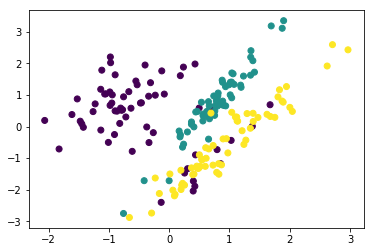

In [11]:
X_resampled, y_resampled = under_sampling.RandomUnderSampler().fit_resample(X, y)
plt.scatter(x=X_resampled[:,0],y=X_resampled[:,1],c=y_resampled)
sorted(Counter(y_resampled).items())

#### 2.2 ClusterCentroids
对负样本进行聚类，聚类中心点作为新的负样本，  
特点：负样本分布变化不大

[(0, 64), (1, 64), (2, 64)]

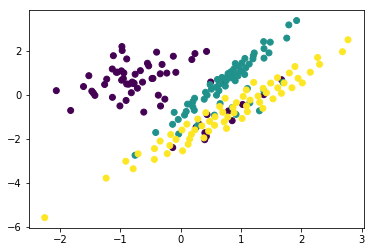

In [12]:
X_resampled, y_resampled = under_sampling.ClusterCentroids().fit_resample(X, y)
plt.scatter(x=X_resampled[:,0],y=X_resampled[:,1],c=y_resampled)
sorted(Counter(y_resampled).items())

#### 2.3 TomekLinks
TomekLinks规则表示这样的样本对，它们互为异类，且互为最近邻，所以TomekLinks规则描述的通常是边界点或者异常点，TomekLinks欠采样有两种方式：  
（1）`sampling_strategy='auto'`会只移除掉多数类的点(default)；  
（2）`sampling_strategy='all'`会同时移除掉多数类和少数类的点

[(0, 64), (1, 249), (2, 4654)]

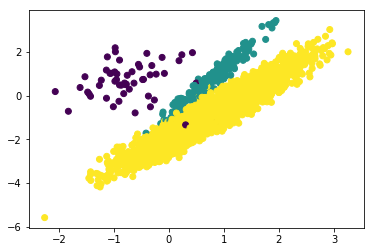

In [13]:
X_resampled, y_resampled = under_sampling.TomekLinks().fit_resample(X, y)
plt.scatter(x=X_resampled[:,0],y=X_resampled[:,1],c=y_resampled)
sorted(Counter(y_resampled).items())

[(0, 55), (1, 249), (2, 4654)]

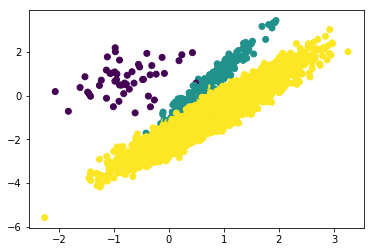

In [14]:
X_resampled, y_resampled = under_sampling.TomekLinks(sampling_strategy='all').fit_resample(X, y)
plt.scatter(x=X_resampled[:,0],y=X_resampled[:,1],c=y_resampled)
sorted(Counter(y_resampled).items())

#### 2.4 OneSidedSelection
OneSidedSelection法是对TomekLinks法（sampling_strategy='auto'）进一步扩展，它会删掉另外一些冗余的多数类样本；具体流程如下：  
（1）训练一个`1-NN`分类器（即KNN中K取1），对错分的点使用TomekLinks规则删掉多数类样本；  
（2）将正确分类的多数类点视为冗余样本而删掉

[(0, 64), (1, 165), (2, 4287)]

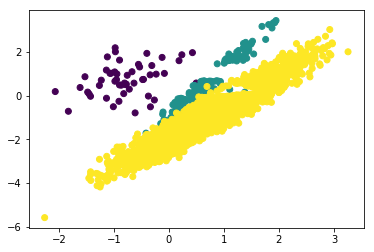

In [15]:
X_resampled, y_resampled = under_sampling.OneSidedSelection().fit_resample(X, y)
plt.scatter(x=X_resampled[:,0],y=X_resampled[:,1],c=y_resampled)
sorted(Counter(y_resampled).items())

#### 2.5 NearMiss
NearMiss方法是利用距离远近剔除多数类样本的一类方法，实际操作中也是借助kNN，总结起来有以下几类：  
`version=1`：在多数类样本中选择与最近的3个少数类样本的平均距离最小的样本。  
`version=2`：在多数类样本中选择与最远的3个少数类样本的平均距离最小的样本。  
`version=3`：对于每个少数类样本，选择离它最近的给定数量的多数类样本。  

[(0, 64), (1, 64), (2, 64)]

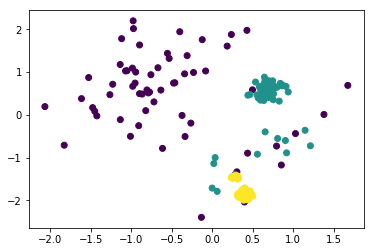

In [16]:
X_resampled, y_resampled = under_sampling.NearMiss(version=1).fit_resample(X, y)
plt.scatter(x=X_resampled[:,0],y=X_resampled[:,1],c=y_resampled)
sorted(Counter(y_resampled).items())

[(0, 64), (1, 64), (2, 64)]

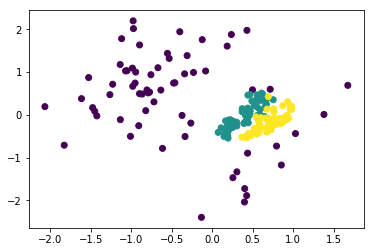

In [17]:
X_resampled, y_resampled = under_sampling.NearMiss(version=2).fit_resample(X, y)
plt.scatter(x=X_resampled[:,0],y=X_resampled[:,1],c=y_resampled)
sorted(Counter(y_resampled).items())

[(0, 64), (1, 44), (2, 56)]

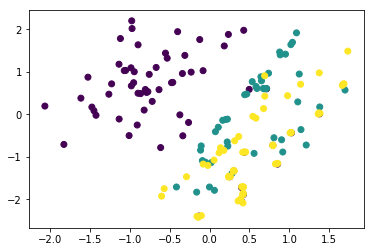

In [18]:
X_resampled, y_resampled = under_sampling.NearMiss(version=3).fit_resample(X, y)
plt.scatter(x=X_resampled[:,0],y=X_resampled[:,1],c=y_resampled)
sorted(Counter(y_resampled).items())

#### 2.6 EditedNearestNeighbours
删除那些类别与其最近的三个近邻样本中的两个或两个以上的样本类别不同的样本；  
特点：样本主要都是多数类，能删的不多

[(0, 64), (1, 213), (2, 4568)]

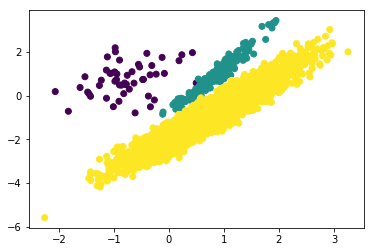

In [19]:
X_resampled, y_resampled = under_sampling.EditedNearestNeighbours().fit_resample(X, y)
plt.scatter(x=X_resampled[:,0],y=X_resampled[:,1],c=y_resampled)
sorted(Counter(y_resampled).items())

#### 2.7 RepeatedEditedNearestNeighbours
对EditedNearestNeighbours运行多次（能多删掉一点点多数类样本）

[(0, 64), (1, 208), (2, 4551)]

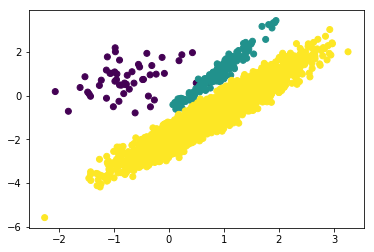

In [20]:
X_resampled, y_resampled = under_sampling.RepeatedEditedNearestNeighbours().fit_resample(X, y)
plt.scatter(x=X_resampled[:,0],y=X_resampled[:,1],c=y_resampled)
sorted(Counter(y_resampled).items())

#### 2.8 CondensedNearestNeighbour
训练一个1-NN分类器，将少数类样本和多数类中被1-NN分错的样本选出来  
特点：对异常点敏感，因为它最近邻的点都会被选择

[(0, 64), (1, 24), (2, 114)]

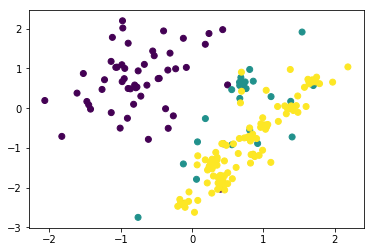

In [21]:
X_resampled, y_resampled = under_sampling.CondensedNearestNeighbour().fit_resample(X, y)
plt.scatter(x=X_resampled[:,0],y=X_resampled[:,1],c=y_resampled)
sorted(Counter(y_resampled).items())

#### 2.9 NeighbourhoodCleaningRule
该方法首先会训练一个3-NN分类器，将错分点和EditedNearestNeighbours选择的点并起来

[(0, 64), (1, 234), (2, 4666)]

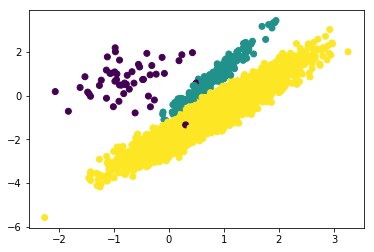

In [22]:
X_resampled, y_resampled = under_sampling.NeighbourhoodCleaningRule().fit_resample(X, y)
plt.scatter(x=X_resampled[:,0],y=X_resampled[:,1],c=y_resampled)
sorted(Counter(y_resampled).items())

#### 2.10 AllKNN

[(0, 64), (1, 220), (2, 4601)]

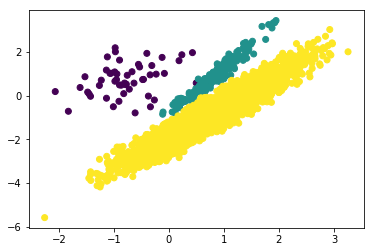

In [23]:
X_resampled, y_resampled = under_sampling.AllKNN().fit_resample(X, y)
plt.scatter(x=X_resampled[:,0],y=X_resampled[:,1],c=y_resampled)
sorted(Counter(y_resampled).items())

#### 2.11 InstanceHardnessThreshold
该方法会首先训练一个分类器, 然后调用分类器的`predict_proba`方法，保留多数类中概率值最高的样本点

[(0, 64), (1, 64), (2, 64)]

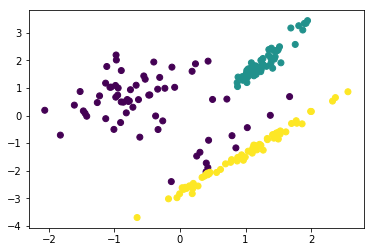

In [24]:
from sklearn.linear_model import LogisticRegression
X_resampled, y_resampled = under_sampling.InstanceHardnessThreshold(estimator=LogisticRegression()).fit_resample(X, y)
plt.scatter(x=X_resampled[:,0],y=X_resampled[:,1],c=y_resampled)
sorted(Counter(y_resampled).items())

### 三.混合采样

#### 3.1 SMOTEENN
先做SMOTE再做ENN

[(0, 4022), (1, 4362), (2, 3484)]

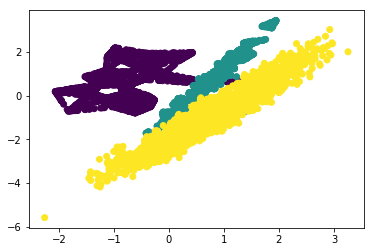

In [25]:
X_resampled, y_resampled = combine.SMOTEENN().fit_resample(X, y)
plt.scatter(x=X_resampled[:,0],y=X_resampled[:,1],c=y_resampled)
sorted(Counter(y_resampled).items())

#### 3.2 SMOTETomek
先做SMOTE再做TomekLinks

[(0, 4494), (1, 4572), (2, 4428)]

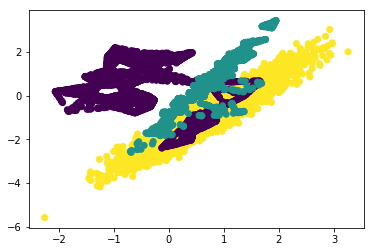

In [26]:
X_resampled, y_resampled = combine.SMOTETomek().fit_resample(X, y)
plt.scatter(x=X_resampled[:,0],y=X_resampled[:,1],c=y_resampled)
sorted(Counter(y_resampled).items())